In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [34]:
import pandas as pd
import numpy as np
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.metrics import classification_report, confusion_matrix,plot_confusion_matrix,plot_roc_curve
from sklearn.svm import SVC 
def sep_X_Y(df):
    cols=df.columns
    X = df[cols[:-1]].to_numpy()
    Y = df[cols[-1]].to_numpy()
    return X,Y

In [13]:
df = pd.read_csv('/content/drive/My Drive/mkc.csv')
X,Y = sep_X_Y(df)

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0, stratify = Y)
params = {'C': [0.1*x for x in [1,10,100,1000]],  
              'gamma': [0.001*x for x in [1,10,100,1000]], 
              'kernel': ['rbf','polynomial','sigmoid']} 
grid = GridSearchCV(SVC(), params, verbose = 10,n_jobs = -1)  
grid.fit(X_train, Y_train) 
print(grid.best_params_) 
print(grid.best_estimator_)


Fitting 5 folds for each of 48 candidates, totalling 240 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:   46.4s
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:  2.9min
[Parallel(n_jobs=-1)]: Done  21 tasks      | elapsed:  4.7min
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:  5.6min
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:  7.6min
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:  9.7min
[Parallel(n_jobs=-1)]: Done  57 tasks      | elapsed: 11.6min
[Parallel(n_jobs=-1)]: Done  68 tasks      | elapsed: 14.5min
[Parallel(n_jobs=-1)]: Done  81 tasks      | elapsed: 19.6min
[Parallel(n_jobs=-1)]: Done  94 tasks      | elapsed: 24.8min
[Parallel(n_jobs=-1)]: Done 109 tasks      | elapsed: 29.9min
[Parallel(n_jobs=-1)]: Done 124 tasks      | elapsed: 35.8min
[Parallel(n_jobs=-1)]: Done 141 tasks      | elapsed: 41

{'C': 100.0, 'gamma': 0.01, 'kernel': 'rbf'}
SVC(C=100.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.01, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)


NameError: ignored

In [16]:
print(classification_report(Y_test,grid.predict(X_test)))

              precision    recall  f1-score   support

           0       0.74      0.63      0.68      2896
           1       0.69      0.78      0.73      3000

    accuracy                           0.71      5896
   macro avg       0.71      0.71      0.71      5896
weighted avg       0.71      0.71      0.71      5896



In [17]:
print(classification_report(Y_train,grid.predict(X_train)))

              precision    recall  f1-score   support

           0       0.94      0.97      0.95     11582
           1       0.97      0.94      0.95     12000

    accuracy                           0.95     23582
   macro avg       0.95      0.95      0.95     23582
weighted avg       0.95      0.95      0.95     23582



In [25]:
pd.DataFrame(grid.cv_results_)['mean_test_score']

0     0.568654
1          NaN
2     0.508863
3     0.538462
4          NaN
5     0.508863
6     0.528921
7          NaN
8     0.508863
9     0.514630
10         NaN
11    0.508863
12    0.642185
13         NaN
14    0.508863
15    0.646849
16         NaN
17    0.508863
18    0.645577
19         NaN
20    0.508863
21    0.640107
22         NaN
23    0.508863
24    0.650708
25         NaN
26    0.508863
27    0.678484
28         NaN
29    0.508863
30    0.663684
31         NaN
32    0.508863
33    0.641888
34         NaN
35    0.508863
36    0.687261
37         NaN
38    0.508863
39    0.691714
40         NaN
41    0.508863
42    0.659698
43         NaN
44    0.508863
45    0.642779
46         NaN
47    0.508863
Name: mean_test_score, dtype: float64

In [26]:
import pickle
with open('/content/drive/My Drive/grid_pickle.pkl','wb') as f:
    pickle.dump(grid,f)

In [27]:
with open('/content/drive/My Drive/grid_pickle.pkl','rb') as f:
    gg = pickle.load(f)

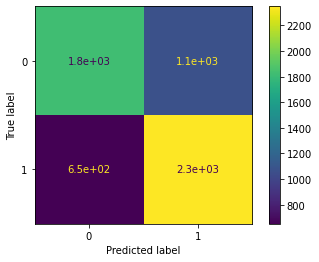

In [32]:
import matplotlib.pyplot as plt 
%matplotlib inline
plot_confusion_matrix(grid, X_test, Y_test)
plt.show()

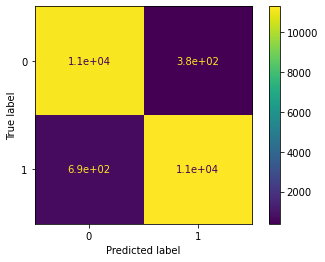

In [33]:
plot_confusion_matrix(grid, X_train, Y_train)
plt.show()

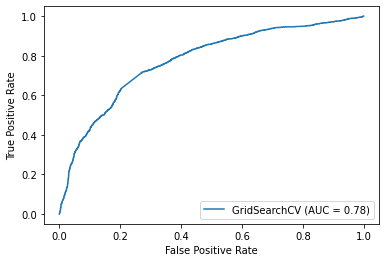

In [35]:
plot_roc_curve(grid, X_test, Y_test)
plt.show()

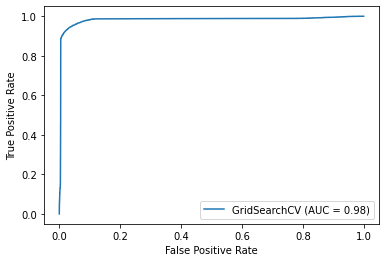

In [36]:
plot_roc_curve(grid, X_train, Y_train)
plt.show()